# Machine Learning (L4&5)

# 机器学习/深度学习的标准流程

课程通过一个“判断手写数字是否为5”的二分类任务，系统地介绍了监督学习的六大步骤：

1.  设立任务 (Set up the task)：明确目标，例如图像分类。
2.  准备数据 (Prepare the data)：需要一个带标签的数据集，如MNIST。
3.  构建模型 (Build a model)：选择一个数学模型来拟合输入（图像）到输出（标签）的关系。
4.  设定目标 (Decide the objective)：定义一个**损失函数 (Loss Function)**，用来衡量模型预测的好坏。
5.  执行拟合 (Perform fitting)：通过**优化算法 (Optimization)**，调整模型参数，使得损失函数最小化。
6.  测试评估 (Testing)：在未见过的新数据上评估模型的泛化能力。

## (一)基础模型

*   **模型演进**：
    1.  **逻辑回归 (Logistic Regression)**：作为一个最简单的“神经网络”，它将图像“压平”成一个长向量，通过一个线性变换和Sigmoid激活函数，输出一个0到1之间的概率值。
    2.  **多层感知机 (Multi-Layer Perceptron, MLP)**：通过堆叠多个线性层和非线性激活函数（如ReLU），MLP可以学习复杂的非线性关系，解决逻辑回归无法处理的“线性不可分”问题。

### 一、逻辑回归 (Logistic Regression)
逻辑回归: 一个“单层神经网络”

任务范例：判断一张 28x28 像素的手写数字图像是否为数字“5”。这是一个典型的“是”或“否”的问题。

#### (1)模型构建三部曲
逻辑回归模型的构建过程可以清晰地分为三步，这三步也体现了神经网络单个神经元的基本工作原理。
1. 步骤一：输入处理 —— 压平 (Flatten)
2. 步骤二：核心计算 —— 线性加权求和 (Linear Combination)
操作：用一个权重向量 θ 与输入向量 x 进行点积运算（z = θ^T * x），有时还会加上一个偏置项 b。  
直观理解：这相当于给每个像素的重要性赋予一个权重。例如，如果图像中心区域的像素对于判断“5”更重要，那么对应位置的权重 θ 值就会更大。这个计算结果 z 可以看作是一个“得分”。
3. 步骤三：输出转换 —— Sigmoid激活函数
问题：线性计算得到的“得分” z 是一个从负无穷到正无穷的实数，而我们希望得到的是一个表示“是‘5’的概率”，这个概率值应该在 [0, 1] 区间内。  
解决方案：使用 Sigmoid 函数（也叫Logistic函数），其公式为 g(z) = 1 / (1 + e^(-z))。  
作用：它能将任何实数 z “挤压”到 (0, 1) 的范围内。输出值可以被解释为概率，例如，输出0.99就代表模型有99%的把握认为这张图是“5”。

**模型总结：逻辑回归的完整模型就是这三步的结合，即 预测概率 = Sigmoid(权重 * 输入向量 + 偏置)。**

#### (2)几何直觉与局限性
- 决策边界 (Decision Boundary)：逻辑回归的决策边界是线性的。在二维空间里是一条直线，在三维空间里是一个平面，在高维空间里则是一个“超平面”。它只能用“一刀切”的方式来划分数据。
- 核心局限：它无法解决线性不可分 (Linearly Non-separable) 的问题。

### 二、多层感知机 (MLP) 

MLP通过堆叠多个“神经元层”来克服逻辑回归的线性限制，是真正意义上的“神经网络”。

*   **核心思想**：如果一层（一个线性分割）不够，那就用多层。通过多个层级的复杂变换，MLP可以将原始空间中线性不可分的数据，映射到一个新的、更高维的空间，在这个新空间里数据就变得**线性可分**了。

#### (1)MLP的结构解析

一个典型的MLP由三部分构成：

*   **输入层 (Input Layer)**：接收原始数据（和LR一样，是压平后的图像向量）。
*   **隐藏层 (Hidden Layers)**：可以有一层或多层。每一层都执行两个关键操作：
    1.  **线性变换**：与逻辑回归类似，对上一层的输出进行加权求和 (`W*x + b`)。
    2.  **非线性激活 (Non-linear Activation)**：对线性变换的结果应用一个**非线性激活函数**,使得它的图像不再是一条直线。
*   **输出层 (Output Layer)**：产生最终的预测结果。

##### 非线性激活函数的作用

*   **为什么必须是非线性？** 如果没有非线性激活函数，仅仅是堆叠多个线性层，其最终效果和一个单层的线性模型是完全等价的（因为一系列线性变换的组合仍然是一个线性变换）。这样的网络无论有多少层，都只能解决线性问题。
*   **“掰弯”决策边界**：正是非线性激活函数的引入，才使得每一层都能对数据进行一次“弯曲”或“折叠”，多层组合起来就能拟合出任意复杂的决策边界，从而解决像“同心圆”这样的非线性问题。
*   **常见的激活函数**：课程中提到了Sigmoid，但更强调了现代神经网络中更常用的**ReLU (Rectified Linear Unit)** 函数，它计算简单且能有效缓解梯度消失问题，是目前最主流的选择。

#### (2)MLP的训练与反向传播

*   **训练流程**：与逻辑回归完全一致，遵循“**前向传播 → 计算损失 → 反向传播 → 更新参数**”的循环。
*   **新的挑战**：MLP的参数（各层的权重W和偏置b）数量远多于逻辑回归，如何高效计算损失函数对每一个参数的梯度（导数）成了一个难题。
*   **解决方案：反向传播 (Backpropagation)**
    *   **本质**：一种利用**链式法则**高效计算梯度的算法。
    *   **直观理解**：它首先计算出损失对网络最后一层输出的梯度，然后像多米诺骨牌一样，逐层向后“传播”这个梯度，计算出损失对前一层输出的梯度，并利用这个结果计算当前层参数的梯度，直到第一层为止。
    *   **意义**：反向传播是所有深度学习模型训练的核心算法，使得训练深度、复杂网络成为可能。

#### (3)MLP处理图像的根本缺陷

课程在讲解完MLP后，再次点明了它作为通用模型在应用于图像时的两大硬伤，这也是转向CNN的直接原因：

1.  **参数量爆炸**：由于隐藏层是**全连接 (Fully-connected)** 的（即每个神经元都与前一层的所有神经元相连），当图像分辨率增大时，参数数量会急剧膨胀，导致计算成本极高且容易过拟合。
2.  **空间结构丢失**：最初的“压平”操作彻底破坏了像素之间的邻里关系，而这种空间局部性恰恰是理解图像内容的关键。

#### **总结与对比**

| 特征 | 逻辑回归 (Logistic Regression) | 多层感知机 (MLP) |
| :--- | :--- | :--- |
| **模型结构** | 单层网络（输入直接到输出） | 多层网络（包含一个或多个隐藏层） |
| **核心计算** | 线性变换 + Sigmoid激活 | (线性变换 + **非线性激活**) 的多次堆叠 |
| **决策边界** | **线性** (直线/平面/超平面) | **非线性** (任意复杂形状) |
| **解决问题** | 仅限线性可分问题 | 可解决复杂的非线性问题 |
| **与图像任务的适配性** | 差：破坏空间结构，参数量尚可（因层数少） | **极差**：破坏空间结构，且参数量巨大 |


## 优化方法

*   **核心数学工具**：
    *   **损失函数**：课程推导了**负对数似然损失 (Negative Log-likelihood, NLL)**，这是分类任务中最常用的损失函数之一，其背后思想是最大化“观测到当前标签数据的概率”。
    *   **优化算法**：介绍了**梯度下降 (Gradient Descent, GD)**。即沿着损失函数梯度（导数）的反方向更新模型参数，以最快速度找到损失的最小值。
    *   **训练技巧**：对比了**批量梯度下降 (Batch GD)** 和 **随机/小批量梯度下降 (SGD)** 的优劣。SGD计算速度快，且其随机性有助于跳出“局部最优”，是训练大型网络的标准做法。
    *   **参数更新的核心**：**反向传播 (Backpropagation)**。这是一种利用链式法则高效计算复杂网络中每个参数梯度的算法，是所有深度学习框架的基石。

### 负对数似然损失（NLL）  
**核心目标是：让模型预测的概率分布尽可能地接近真实的标签分布。**

- 如果真实标签是 $ y = 1 $（是“5”），我们希望模型预测 $ p(y=1 \mid x; \theta) $ 接近 1。  
- 如果真实标签是 $ y = 0 $（不是“5”），我们希望模型预测 $ p(y=1 \mid x; \theta) $ 接近 0，即 $ p(y=0 \mid x; \theta) = 1 - p(y=1 \mid x; \theta) $ 接近 1。

---

#### **负对数似然损失 (NLL) 的逻辑推导**

我们的最终目标是找到一组最佳的模型参数 $ \theta $，使得在给定所有训练图片 $ X $ 的情况下，观测到它们对应的所有真实标签 $ Y $ 的**联合概率**最大化。这个原则被称为 **最大似然估计（Maximum Likelihood Estimation, MLE）**。

---

##### **1. 单个数据点的概率建模**

考虑一个样本 $ (x^{(i)}, y^{(i)}) $：

- 模型输出 $ h_\theta(x^{(i)}) $ 表示：  
  $$
  h_\theta(x^{(i)}) = p(y^{(i)} = 1 \mid x^{(i)}; \theta)
  $$
- 因此，类别 0 的概率为：  
  $$
  p(y^{(i)} = 0 \mid x^{(i)}; \theta) = 1 - h_\theta(x^{(i)})
  $$

我们可以用一个统一的公式表示该样本的条件概率：

$$
p(y^{(i)} \mid x^{(i)}; \theta) = \left[ h_\theta(x^{(i)}) \right]^{y^{(i)}} \cdot \left[ 1 - h_\theta(x^{(i)}) \right]^{1 - y^{(i)}}
$$

✅ **验证：**
- 若 $ y^{(i)} = 1 $：  
  $$
  = h_\theta(x^{(i)})^1 \cdot (1 - h_\theta(x^{(i)}))^0 = h_\theta(x^{(i)})
  $$
- 若 $ y^{(i)} = 0 $：  
  $$
  = h_\theta(x^{(i)})^0 \cdot (1 - h_\theta(x^{(i)}))^1 = 1 - h_\theta(x^{(i)})
  $$

---

##### **2. 所有数据点的联合概率（似然函数）**

假设训练集有 $ n $ 个独立同分布的样本，则整个数据集的**似然函数**为：

$$
p(Y \mid X; \theta) = \prod_{i=1}^n p(y^{(i)} \mid x^{(i)}; \theta) = \prod_{i=1}^n \left[ h_\theta(x^{(i)})^{y^{(i)}} \cdot \left(1 - h_\theta(x^{(i)})\right)^{1 - y^{(i)}} \right]
$$

我们的目标：**最大化这个似然函数**。

---

##### **3. 取对数：对数似然函数**

为便于优化（避免连乘、数值下溢、便于求导），对似然函数取自然对数：

$$
\log p(Y \mid X; \theta) = \sum_{i=1}^n \log \left[ h_\theta(x^{(i)})^{y^{(i)}} \cdot \left(1 - h_\theta(x^{(i)})\right)^{1 - y^{(i)}} \right]
$$

利用对数性质 $ \log(ab) = \log a + \log b $ 和 $ \log(a^b) = b \log a $，得到：

$$
\log p(Y \mid X; \theta) = \sum_{i=1}^n \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log \left(1 - h_\theta(x^{(i)})\right) \right]
$$

这就是**对数似然函数**。

---

##### **4. 转换为最小化问题：负对数似然损失（NLL）**

机器学习通常**最小化损失函数**，因此我们对对数似然加负号，定义 **负对数似然损失（NLL）**：

$$
\mathcal{L}(\theta) = -\log p(Y \mid X; \theta) = -\sum_{i=1}^n \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log \left(1 - h_\theta(x^{(i)})\right) \right]
$$

> 🔔 这个损失函数也称为 **二元交叉熵损失（Binary Cross-Entropy Loss）**。

**优化目标**：通过梯度下降等方法，找到 $ \theta $ 使得 $ \mathcal{L}(\theta) $ 最小。

---

#### **总结与训练流程**

在训练过程中，NLL 的使用步骤如下：

1. **前向传播**：输入 $ X $，计算预测概率 $ h_\theta(X) $。
2. **计算损失**：代入 NLL 公式：
   $$
   \mathcal{L}(\theta) = -\sum_{i=1}^n \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) \right]
   $$
3. **反向传播**：计算 $ \frac{\partial \mathcal{L}}{\partial \theta} $。
4. **参数更新**：使用优化器（如 SGD、Adam）更新 $ \theta \leftarrow \theta - \eta \nabla_\theta \mathcal{L} $。

### **梯度下降 (Gradient Descent, GD)**

想象一下，你正身处一个浓雾弥漫的巨大山脉中，你的任务是走到山谷的最低点。由于有浓雾，你看不到整个山脉的全貌。你该怎么办？

最理智的方法是：**环顾你脚下的四周，找到最陡峭的下坡方向，然后朝着那个方向迈出一步。** 重复这个过程，你最终就能到达一个山谷的底部。

*   **山脉**：就是我们的**损失函数 (Loss Function)**。
*   **你在山上的位置**：由模型当前的一组**参数（权重 `W` 和偏置 `b`）**决定。
*   **山的高度**：就是当前参数下的**损失值 (Loss)**。
*   **山谷最低点**：就是我们追求的**最优参数**，此时损失最小。
*   **最陡峭的下坡方向**：就是**梯度的反方向**。梯度（Gradient）本身指向最陡峭的 *上坡* 方向。
*   **迈出的一步大小**：就是**学习率 (Learning Rate)**。

这个“探路下山”的过程，就是梯度下降。其核心更新公式非常简洁：

```
新参数 = 旧参数 - 学习率 * 梯度
```

`θ_new = θ_old - α * ∇L(θ_old)`

*   `θ` 代表模型的所有参数。
*   `α` 是学习率。
*   `∇L(θ)` 是损失函数 `L` 对参数 `θ` 的梯度。

**关键问题**：如何计算这个“梯度”？不同的计算方式，就衍生出了 GD 的不同变体。

---

#### **1. 批量梯度下降 (Batch Gradient Descent, BGD)**

这是最纯粹、最理论化的梯度下降。

*   **工作方式：“深思熟虑的完美主义者”**
    1.  **第一步：审阅全部** - 将**所有**的训练数据（例如，MNIST数据集中的全部60000张图片）都输入到模型中。
    2.  **第二步：计算总分** - 计算出这60000张图片的总损失（通常是平均损失）。
    3.  **第三步：总结经验** - 基于这个总损失，计算一次梯度。这个梯度代表了在**整个数据集上**最理想的下降方向。
    4.  **第四步：迈出一步** - 使用这个“完美”的梯度，更新一次模型的参数。

*   **优点**：
    *   **方向精准**：由于考虑了所有数据，每次更新的方向都非常稳定，能最直接地朝向损失函数的最小值前进。
    *   **收敛平滑**：损失值的下降曲线非常平滑，不会有剧烈震荡。

*   **缺点（致命的）**：
    *   **计算成本极高**：对于现代深度学习任务，数据集动辄百万、千万。让所有数据都参与一次梯度计算，耗时极长。可能训练几天，参数才更新了几次。
    *   **内存消耗巨大**：需要将整个数据集加载到内存中，这在很多情况下是不现实的。

**结论**：BGD 在理论上很完美，但在实践中几乎无法用于训练大型神经网络。

---

#### **2. 随机梯度下降 (Stochastic Gradient Descent, SGD)**

这是为了解决 BGD 的计算效率问题而提出的。

*   **工作方式：“冲动而敏捷的行动派”**
    1.  **第一步：随机应变** - 在训练开始前，先将数据集完全打乱。然后，每次只从数据集中随机抽取**一个**样本（例如，只拿一张图片）。
    2.  **第二步：快速打分** - 计算这一个样本的损失。
    3.  **第三步：立即反思** - 基于这一个样本的损失，立刻计算梯度。这个梯度非常“片面”，只代表了这一个样本的“意见”。
    4.  **第四步：马上行动** - 使用这个“片面”的梯度，更新一次模型参数。然后丢掉这个样本，去看下一个。

*   **优点**：
    *   **速度极快**：参数更新的频率非常高（一个样本就更新一次）。在 BGD 还在吭哧吭哧计算总梯度时，SGD 可能已经更新了几千次参数，模型早已开始学习了。
    *   **低内存消耗**：每次只需要处理一个样本。
    *   **有助于跳出局部最优**：由于每次更新的方向都是基于单个样本，所以更新路径非常“嘈杂”和“随机”（noisy）。这种随机的“晃动”，使得模型在陷入一个不是最低点的“小山谷”（局部最优）时，有可能因为一次“糟糕”的更新而被“踹”出去，从而有机会找到更深的“大峡谷”（全局最优）。

*   **缺点**：
    *   **更新方向不稳定**：损失值的下降曲线会剧烈震荡，因为单个样本的梯度不代表全局方向。
    *   **收敛可能变慢**：在接近最优点时，这种随机性可能会导致模型在最优解附近“徘徊”，难以精确收敛。
    *   **硬件利用率低**：现代的GPU擅长并行计算（矩阵运算）。每次只处理一个样本，无法充分发挥GPU的优势。

---

#### **3. 小批量随机梯度下降 (Mini-Batch SGD)**

这是 BGD 和 SGD 的一个完美折中，也是**现代深度学习中实际使用的标准方法**。在很多框架和论文中，当我们提到“SGD”，通常指的就是 Mini-Batch SGD。

*   **工作方式：“高效协作的小分队”**
    1.  **第一步：分组行动** - 将打乱后的数据集分成若干个**小批量 (Mini-Batch)**，每个批量包含几十到几百个样本（例如，32、64、128个）。
    2.  **第二步：团队评分** - 计算这一个小批量数据的平均损失。
    3.  **第三步：小组讨论** - 基于这个批量的平均损失，计算梯度。这个梯度比单个样本的梯度稳定，又比整个数据集的梯度计算得快。
    4.  **第四步：同步行动** - 使用这个梯度，更新一次参数。然后处理下一个小批量。

*   **优点**：
    *   **集两者之所长**：既保证了较快的更新速度，又使得梯度方向相对稳定。
    *   **充分利用硬件**：小批量的计算可以表示为矩阵运算，能完美地利用GPU的并行处理能力，训练效率极高。
    *   **保留了“跳出”能力**：更新方向仍带有一定的随机性，有助于跳出局部最优。

#### **总结对比**

| 特性 | 批量梯度下降 (BGD) | 随机梯度下降 (SGD) | 小批量随机梯度下降 (Mini-Batch SGD) |
| :--- | :--- | :--- | :--- |
| **每次更新使用的数据** | **全部**数据集 | **1个**样本 | **一个Mini-Batch** (如32, 64) |
| **更新频率** | 非常低 (1次/epoch) | 非常高 (n次/epoch) | 较高 (n/batch_size次/epoch) |
| **计算速度** | 非常慢 | 快 | **非常快 (得益于硬件)** |
| **内存需求** | 非常高 | 非常低 | 较低 |
| **更新稳定性** | **非常稳定** (平滑) | 非常不稳定 (震荡) | 相对稳定 |
| **跳出局部最优能力** | 差 (容易陷入) | 好 | **较好** |
| **当今应用** | 几乎不用 | 理论分析，或在特定场景 | **深度学习的标准** |

*注：1个epoch指模型完整地看过一遍所有训练数据。*

### 反向传播(backpropagation)
**核心模式**：`下游梯度 = 上游梯度 × 局部梯度`。反向传播就是将这个模式在整个计算图上，从后向前，不断应用的自动化过程。
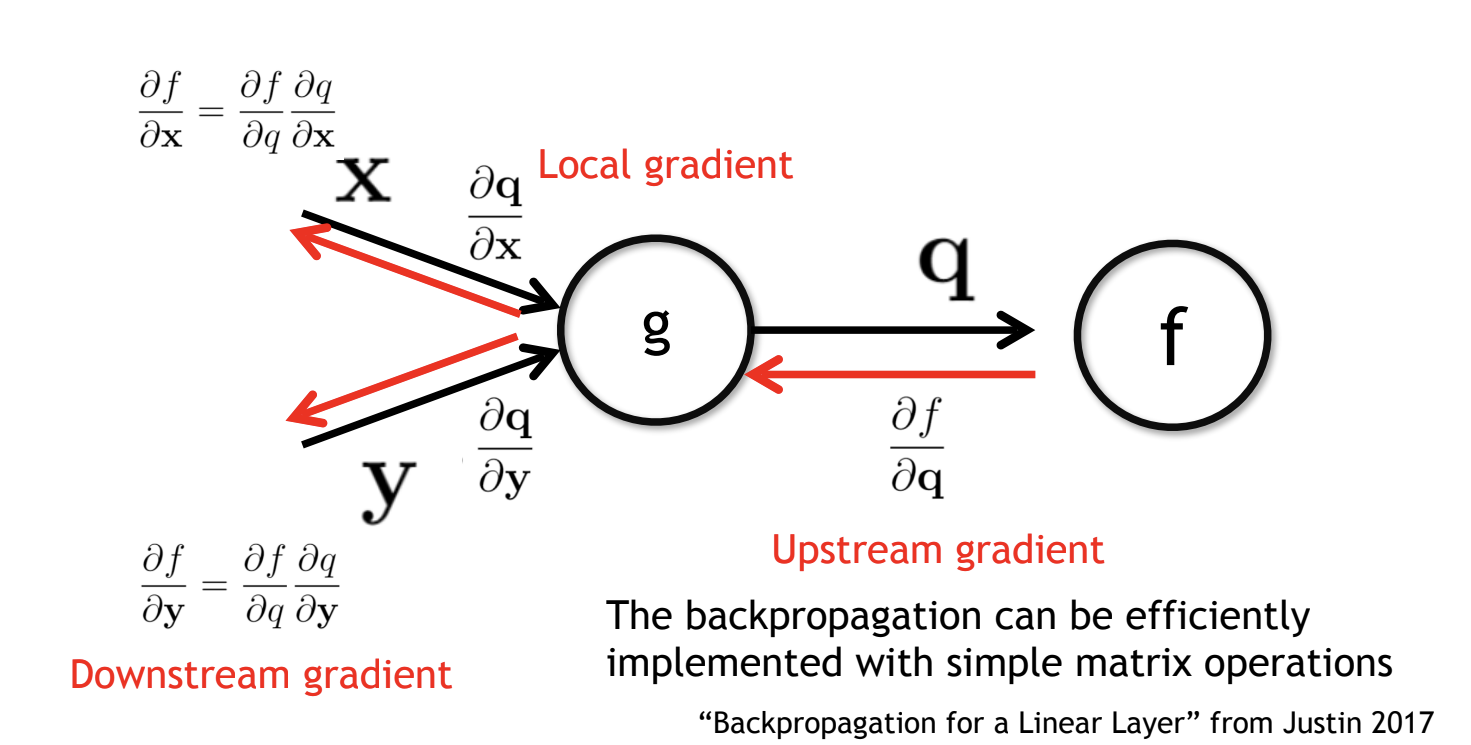

# 卷积神经网络 (Convolutional Neural Network, CNN)

## CNN简介
1.  **为什么需要CNN？MLP处理图像的问题**
    *   **计算量巨大**：将高分辨率图像展平 (Flatten) 成一个长向量，会导致全连接层 (Fully Connected Layer) 的参数数量爆炸式增长。
    *   **破坏空间结构**：展平操作完全破坏了图像中像素点之间的局部空间关系（例如，相邻的像素很可能属于同一个物体）。

2.  **CNN的核心组件：卷积层 (Convolution Layer)**
    *   **保留空间结构**：卷积层直接处理二维（或三维）的图像数据，保留了其空间信息。
    *   **工作原理**：
        *   **滤波器 (Filter/Kernel)**：一个小的权重矩阵（如 5x5x3），其深度与输入图像的深度（通道数）相同。
        *   **卷积操作**：滤波器在输入图像上“滑动”，在每个位置计算滤波器与对应图像区域的点积 (dot product)，生成一个值。
        *   **激活图 (Activation Map)**：滤波器滑过整个图像后，生成一个二维的激活图，代表该滤波器在图像不同位置检测到的特定特征（如边缘、颜色、纹理等）。
        *   **多滤波器**：一个卷积层通常包含多个滤波器，每个滤波器学习提取一种不同的特征。最终将所有激活图堆叠起来，形成下一层的输入。

3.  **卷积层的超参数 (Hyperparameters)**
    *   **滤波器数量 (K)**：决定了输出特征图的深度。
    *   **滤波器尺寸 (F)**：通常为奇数，如3x3, 5x5。
    *   **步长 (S, Stride)**：滤波器每次滑动的距离。
    *   **填充 (P, Padding)**：在图像边界周围填充0，可以控制输出特征图的空间尺寸。一个常见的做法是选择合适的填充值，使得输出尺寸与输入尺寸保持不变。

4.  **CNN的另一组件：池化层 (Pooling Layer)**
    *   **作用**：对特征图进行下采样 (Downsampling)，使其尺寸变小，从而减少计算量，并增强模型的平移不变性。
    *   **最常用类型：最大池化 (Max Pooling)**：在一个区域内（如2x2），只取最大值作为输出。
    *   **特点**：池化层没有需要学习的参数。

5.  **典型的CNN架构**
    *   通常由多个 `[卷积层(CONV) -> 激活函数(ReLU)]` 和 `池化层(POOL)` 交替堆叠而成，最后再接上几个 `全连接层(FC)` 进行分类。
    *   现代趋势是使用更小的滤波器（如3x3）和更深的网络结构。

---

## CNN的核心优势：为什么它如此强大？

1.  **参数共享 (Parameter Sharing)**
    *   **概念**：一个滤波器中的权重参数在整个图像上是共享的。无论滤波器滑动到哪个位置，用的都是同一套权重。
    *   **优势**：极大地减少了模型的参数量。例如，一个在100x100图像上应用的3x3滤波器，FC层可能需要数百万参数，而CNN只需要 `3*3=9` 个参数（加上偏置）。
    *   **内在逻辑**：图像中的局部特征（如边缘）可能出现在任何位置，因此用同一个特征检测器（滤波器）去扫描整张图是合理且高效的。

2.  **稀疏连接 (Sparse Connectivity)**
    *   **概念**：在CNN中，输出特征图上的每个单元只与输入层的一个小局部区域相连接，而不是像FC层那样与所有输入单元相连。
    *   **优势**：使得网络能够学习到局部的、有意义的特征，并随着层级加深，将这些局部特征组合成更复杂的全局特征。

3.  **平移等变性 (Equivariance) 与不变性 (Invariance)**
    *   **等变性**：在卷积层中，如果输入图像发生平移，输出的激活图也会发生相应的平移。这得益于参数共享。
    *   **不变性**：池化层引入了局部平移不变性。一个特征在小范围内移动，经过最大池化后，输出结果可能保持不变。
    *   **意义**：这使得CNN对于目标在图像中的位置不那么敏感，更容易优化和学习，这正是图像识别任务所需要的特性。FC层则不具备这个特性，图像微小的平移或旋转都会导致输出剧烈变化。